In [ ]:
#EXERCISE 3

#A)It is implemented by dividing observations into groups of equal size. The first is treated as a validation set, 
#and the second is fit on the remaining k − 1.

#B) 
#i) Adv: Easy computational implementation
#Disad: Difficulties to fir the model due to overestimation

#ii) Adv: Can be more accurate
#Disad: Slower than the validation set approach

In [1]:
#EXERCISE 8
#A
set.seed(1)
x <- rnorm(100)
y <- x-2*x^2+rnorm(100)
# IN THIS CASE n=100 and p=2 

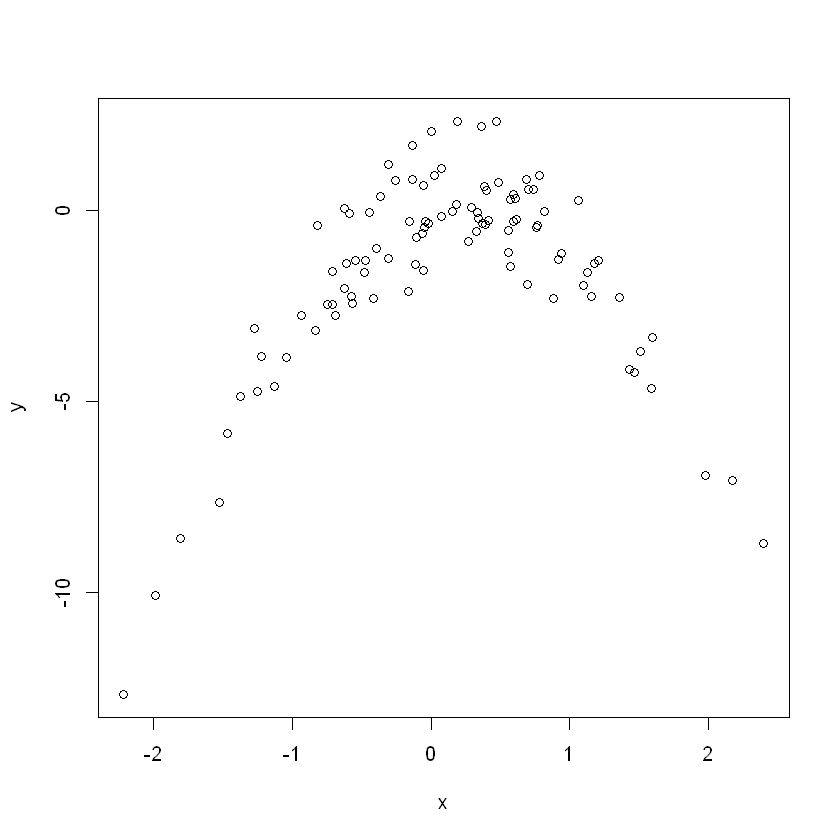

In [2]:
#B
plot(x,y)
#the plot shows a parabolic relationship between x and y


In [3]:
#C
set.seed(123)
library(boot)
dataframe <- data.frame(x, y)

In [4]:
glm <- glm(y ~ x)
cv <- cv.glm(dataframe, glm)$delta[1]
cv

[1] 7.288162

In [5]:
glm0 <- glm(y ~ poly(x,2))
cv0 <- cv.glm(dataframe, glm0)$delta[1]
cv0

[1] 0.9374236

In [6]:
glm1 <- glm(y ~ poly(x,3))
cv1 <- cv.glm(dataframe, glm1)$delta[1]
cv1

[1] 0.9566218

In [7]:
glm2 <- glm(y ~ poly(x,4))
cv2 <- cv.glm(dataframe, glm2)$delta[1]
cv2

[1] 0.9539049

In [10]:
#D USE DIFFERENT SEED AND SEE DIFFERENCES
set.seed(121)
library(boot)
dataframe <- data.frame(x, y)

In [11]:
glm <- glm(y ~ x)
cv <- cv.glm(dataframe, glm)$delta[1]
cv

glm0 <- glm(y ~ poly(x,2))
cv0 <- cv.glm(dataframe, glm0)$delta[1]
cv0

glm1 <- glm(y ~ poly(x,3))
cv1 <- cv.glm(dataframe, glm1)$delta[1]
cv1

glm2 <- glm(y ~ poly(x,4))
cv2 <- cv.glm(dataframe, glm2)$delta[1]
cv2

[1] 7.288162

[1] 0.9374236

[1] 0.9566218

[1] 0.9539049

In [ ]:
#E
#GLM0 had the smallest LOCCV in both part C and D

In [12]:
#F
summary(glm2)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


In [13]:
#CHAPTER 6, EX1

library(ISLR)
data(College)
set.seed(123)


In [14]:
#A
data <- sample(1:nrow(College), nrow(College)/2)
train <- College[data,]
test <- College[-data,]

In [15]:
#B
lm <- lm(Apps ~ ., data = train)
lm_p <- predict(lm, test)
lm_e <- mean((test$Apps - lm_p)^2)
lm_e

[1] 1373995

In [16]:
#C
library(glmnet)

train_ <- model.matrix(Apps ~ ., data = train)
train_ <- train[, "Apps"]
test_ <- model.matrix(Apps ~ ., data = test)
test_ <- test[, "Apps"]



Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [19]:
#D
l <- glmnet(train_, train_, alpha = 1, lambda = g, thresh = 1e-12)
la <- cv.glmnet(train_, train_, alpha = 1, lambda = g, thresh = 1e-12)
lambda <- la.cv$lambda.min

ERROR: Error in if (is.null(np) | (np[2] <= 1)) stop("x should be a matrix with 2 or more columns"): argument is of length zero



  There is a binary version available but the source version is later:
    binary source needs_compilation
pls  2.7-3  2.8-0             FALSE



installing the source package 'pls'



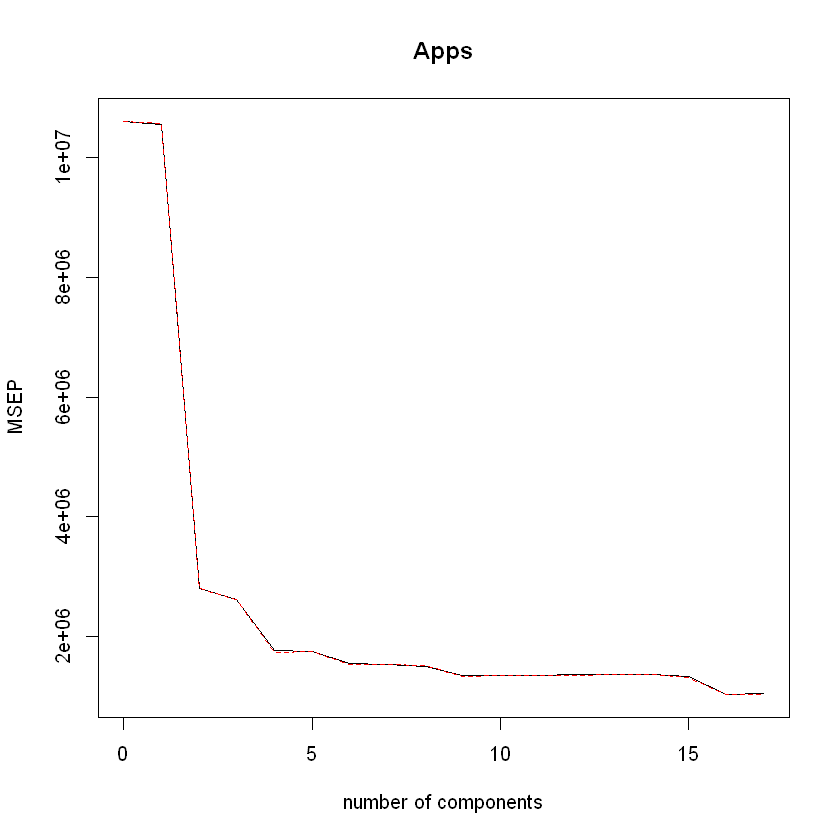

In [23]:
#E
install.packages("pls")
library(pls)

fit <- pcr(Apps ~ ., data = train, scale = TRUE, validation = "CV")
validationplot(fit, val.type="MSEP")

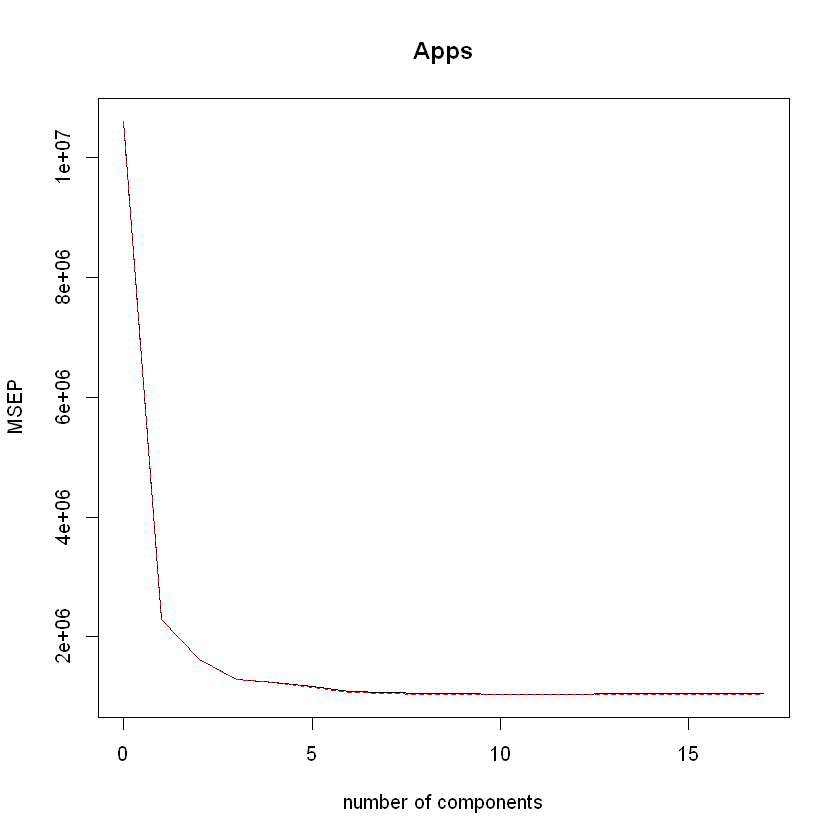

In [25]:
#F
fit <- plsr(Apps ~ ., data = train, scale = TRUE, validation = "CV")
validationplot(fit, val.type = "MSEP")

In [29]:
#G
t <- mean(test$Apps)


In [30]:
#Chapter 7, Exercise 9
#A
library(MASS)
data(Boston)

f <- lm(nox ~ poly(dis, 3), data = Boston)
summary(f)

#B


Warning message:
"package 'MASS' was built under R version 3.6.3"


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


In [33]:
#Chapter 7, Exercise 10
#A (Chapter 6, Ex 1)

install.packages("leaps")
library(leaps)
library(ISLR)
data <- sample(1:nrow(College), nrow(College)/2)
train <- College[data,]
test <- College[-data,]
fit <- regsubsets(Outstate ~ ., data = train, method = 'forward')
fit1 <- summary(fit)
fit1

Warning message:
"package 'leaps' is in use and will not be installed"

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = train, method = "forward")
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 ) " "        " "  " "    " "    " "       " "       " "        
2  ( 1 ) " "        " "  " "    " "    " "       " "       " "        
3  ( 1


  There is a binary version available but the source version is later:
    binary source needs_compilation
gam 1.16.1   1.20              TRUE

  Binaries will be installed


Warning message:
"package 'gam' is in use and will not be installed"Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

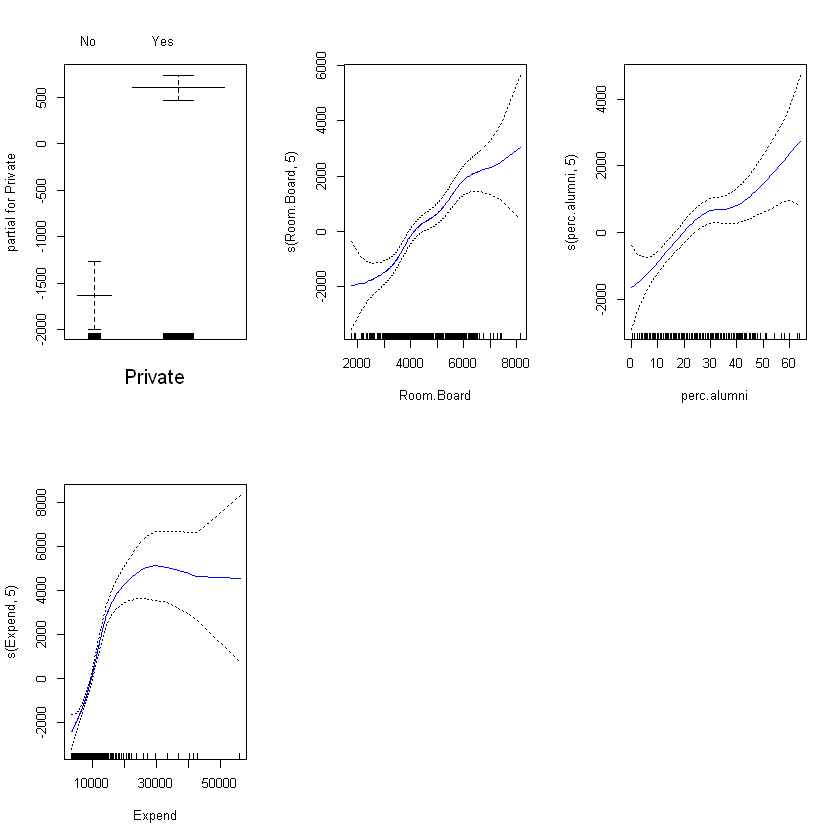

In [37]:
#B
install.packages("gam")
library(gam)
gam <- gam(Outstate ~ Private + s(Room.Board, 5) + s(perc.alumni, 5) + s(Expend, 5), data = train)
par(mfrow = c(2,3))
plot(gam, se = TRUE, col = 'blue')